<a href="https://colab.research.google.com/github/laibamushtaq0/data-science-internship-2025/blob/main/task3_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 3: Fraud Detection System

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [21]:
# Upload your 'creditcard.csv' file manually using the file browser in Colab
df = pd.read_csv('creditcard.csv')
print("Dataset Loaded. Shape:", df.shape)
df.head()


Dataset Loaded. Shape: (75357, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64


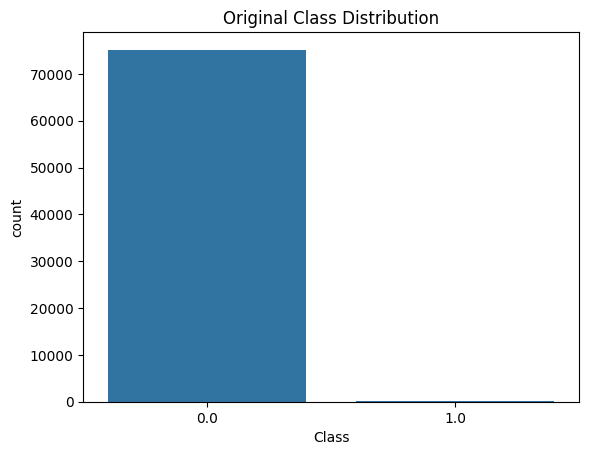

In [22]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Show class distribution
sns.countplot(x='Class', data=df)
plt.title("Original Class Distribution")
plt.show()


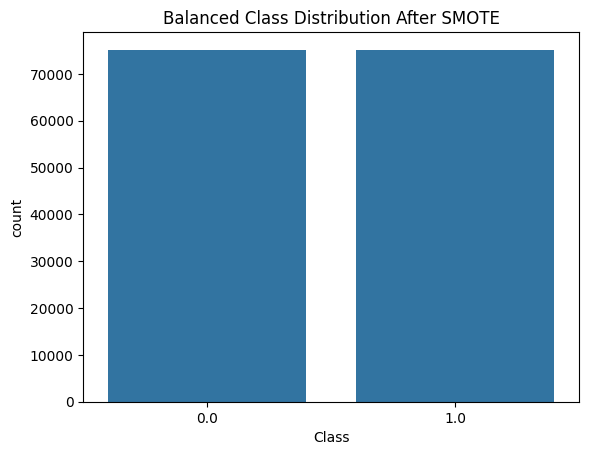

In [23]:
# Clean the data: remove missing values
df = df.dropna(subset=['Class'])
df = df.dropna()

# Define features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE on the entire dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Show new class distribution
sns.countplot(x=y_res)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     15013
       Fraud       1.00      1.00      1.00     15057

    accuracy                           1.00     30070
   macro avg       1.00      1.00      1.00     30070
weighted avg       1.00      1.00      1.00     30070



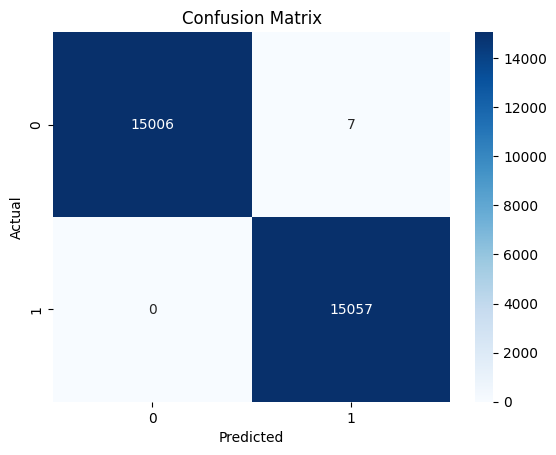

In [26]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# Use DataFrame instead of raw NumPy array to preserve feature names
def predict_transaction(input_data):
    if isinstance(input_data, pd.Series):
        input_data = input_data.values.reshape(1, -1)
        input_data = pd.DataFrame(input_data, columns=X.columns)  # Ensure column names match
    elif isinstance(input_data, np.ndarray):
        input_data = pd.DataFrame([input_data], columns=X.columns)

    prediction = model.predict(input_data)[0]
    return "Fraudulent Transaction" if prediction == 1 else "✅ Legitimate Transaction"


In [28]:
# Take a sample from X_test and predict
sample = X_test.iloc[0]
print("Sample Prediction:\n", predict_transaction(sample))

Sample Prediction:
 Fraudulent Transaction
